# **Preprocessing Setup**

# Install Necessary Libraries

In [ ]:
!pip install parsivar
!pip install emoji
!pip install -U tensorflow
!pip install fastapi kaleido python-multipart uvicorn
!pip install dadmatools
!pip install -U accelerate
!pip install -U transformers
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.1 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.7/60.7 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.4 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 20.1 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.35.2
    Uninstalling transformers-4.35.2:
      Successfully uninstalled transformers-4.35.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.8 MB/s eta 0:00:00
  Attempting uninstall: dill
    Found existing installation: dill 0.3.8
    Uninstalling dill-0.3.8:
      Successfully uninstalled dill-0.3.8


# Use Parsivar to Preprocess Input Text

In [ ]:
# fix the problem with numpy version's attributes and warnings
import numpy as np

def dummy_npwarn_decorator_factory():
  def npwarn_decorator(x):
    return x
  return npwarn_decorator

np._no_nep50_warning = getattr(np, '_no_nep50_warning', dummy_npwarn_decorator_factory)

In [ ]:
from parsivar import Normalizer
import regex as re

In [ ]:
def clean_persian_text(text):
    # Step 0: Use Parsivar to normalize data
    normalizer = Normalizer()
    text = normalizer.normalize(text)

    text = text.replace('٥', '5')

    # Step 1: Remove any English character from the text
    text = re.sub(r'[a-zA-Z]', '', text)

    # Step 2: Remove letters repeated more than twice
    text = re.sub(r'(.)\1{2,}', r'\1', text)

    # Step 3: Remove any Arabic diacritics from the text
    arabic_diacritics = re.compile("""
                             ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)
    text = re.sub(arabic_diacritics, '', text)

    # Step 4: Remove the hashtag sign (“#”) from the text while keeping the information included in the hashtags
    text = re.sub(r'#', ' ', text)
    text = text.replace('_', ' ')

    # Step 5: Remove Persian and Arabic numeric characters from the text
    text = re.sub(r'\d+', '', text)

    # Step 6: Last normalization
    text = normalizer.normalize(text)

    return text

## Tools for Extracting Emojis from Text

In [ ]:
import emoji

In [ ]:
def extract_emojis_from_list(input_list: list):
    return [emoji.distinct_emoji_list(s) for s in input_list]

In [ ]:
def extract_emojy_from_text(input_txt: str):
    return ' '.join(emoji.distinct_emoji_list(input_txt))

## Dadmatools: an Alternative to Parsivar

In [ ]:
from dadmatools.normalizer import Normalizer
# import dadmatools.pipeline.language as language
import regex as re

In [ ]:
text = """
<p>
دادماتولز اولین نسخش سال ۱۴۰۰ منتشر شده.
امیدواریم که این تولز بتونه    کار با متن َُرو براتون شیرین‌تر و راحت‌تر کنه
لطفا با ایمیل dadmatools@dadmatech.ir با ما در ارتباط باشید
آدرس گیت‌هاب هم که خب معرف حضور مبارک هست:
 https://github.com/Dadmatech/DadmaTools
راستش خیللیییی خیلللییی غمگینه
سحیح است
دیّروز ایٌمیل کرد
می خوام برم
</p>
"""

In [ ]:
pipe_itf = 'tok, itf'
pipe_spellchecker = 'tok, spellchecker'
nlp_itf = language.Pipeline(pipe_itf)
nlp_spellchecker = language.Pipeline(pipe_spellchecker)

Downloading:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

persian.vocabs.json:   0%|          | 0.00/6.10k [00:00<?, ?B/s]

persian_lemmatizer.pt:   0%|          | 0.00/2.89M [00:00<?, ?B/s]

persian_mwt_expander.pt:   0%|          | 0.00/589k [00:00<?, ?B/s]

persian.tagger.mdl:   0%|          | 0.00/17.0M [00:00<?, ?B/s]

persian.tokenizer.mdl:   0%|          | 0.00/9.51M [00:00<?, ?B/s]

Loading pretrained XLM-Roberta, this may take a while...


Downloading:   0%|          | 0.00/512 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Loading tokenizer for persian
Loading multi-word expander for persian
3gram.bin: 2.30GB [00:39, 62.7MB/s]
assets.pkl: 3.14MB [00:00, 55.1MB/s]                   
irregular_verb_mapper.csv: 100%|██████████| 1.57k/1.57k [00:00<00:00, 5.60MB/s]
verbs.csv: 100%|██████████| 39.4k/39.4k [00:00<00:00, 36.2MB/s]
Active language: persian
Loading pretrained XLM-Roberta, this may take a while...
Model fa_tokenizer exists in cache/dadmatools/fa_tokenizer.pt
Loading tokenizer for persian
Loading multi-word expander for persian


config.json:   0%|          | 0.00/440 [00:00<?, ?B/s]

state_dict_nevise.pt:   0%|          | 0.00/959M [00:00<?, ?B/s]

vocab.pkl:   0%|          | 0.00/3.80M [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.20M [00:00<?, ?B/s]

Active language: persian


In [ ]:
# doc is an SpaCy object
normalizer = Normalizer(full_cleaning=True)
text = normalizer.normalize(text)
text = nlp_itf(text)['itf']
text = nlp_spellchecker(text)['spellchecker']['corrected']
print(text)

In [ ]:
def clean_persian_text_dadmatools(text):
    # Step 1: Use Dadmatools to normalize data
    normalizer = Normalizer(full_cleaning=True)
    text = normalizer.normalize(text)

    # Step 2: Remove any English character from the text
    text = re.sub(r'[a-zA-Z]', '', text)

    # Step 3: Remove any Arabic diacritics from the text
    arabic_diacritics = re.compile("""
                             ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)
    text = re.sub(arabic_diacritics, '', text)

    # Step 4: Remove informal words
    # text = nlp_itf(text)['itf']

    # Step 5: Check Spell - Correction
    # text = nlp_spellchecker(text)['spellchecker']['corrected']

    # Step 6: Remove any Arabic diacritics after corrections
    # text = re.sub(arabic_diacritics, '', text)

    # Step 7: Last Normalizer - Remove additional verbs and words after correction
    text = normalizer.normalize(text)

    return text

In [ ]:
text = clean_persian_text(text)
print(text)

دادماتولز نسخش سال منتشر تولز بتونه کار متن براتون شیرین‌تر راحت‌تر کنه ایمیل ارتباط آدرس گیت‌هاب معرف حضور مبارک راستش خیللیییی خیلللییی غمگینه سحیح ایمیل خوام برم


# **Preprocess Input Text**

## Import Necessary Libraries

In [ ]:
import torch
import pandas as pd
import numpy as np
from tqdm import tqdm
import torch.nn as nn
from transformers import AutoTokenizer, get_linear_schedule_with_warmup, AdamW, get_scheduler,\
 AutoModel, AutoModelForSequenceClassification, TrainingArguments, Trainer, DataCollatorWithPadding,\
 pipeline
from datasets import DatasetDict, Dataset, load_dataset
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from tqdm.notebook import tqdm
import pandas as pd
import os
from google.colab import drive

## Download ArmanEmo Dataset

In [ ]:
progress = tqdm(total=2)

!wget https://raw.githubusercontent.com/Arman-Rayan-Sharif/arman-text-emotion/main/dataset/train.tsv -q
progress.set_description(f"Downloading Files")
progress.update(1)

!wget https://raw.githubusercontent.com/Arman-Rayan-Sharif/arman-text-emotion/main/dataset/test.tsv -q
progress.set_description(f"Downloading Files")
progress.update(1)

progress.close()

  0%|          | 0/2 [00:00<?, ?it/s]

## Read the Dataset

In [ ]:
header = ['text', 'label']
train_data = pd.read_csv('train.tsv', delimiter='\t', names=header)
test_data = pd.read_csv('test.tsv', delimiter='\t', names=header)

train_data.head()

,text,label
0,خیلی کوچیک هستن و سایزشون بدرد نمیخوره میخوام ...,SAD
1,از صدای پرنده دم دمای صبح متنفرم متنفرم متنفرم,HATE
2,"""کیفیتش خیلی خوبه با شک خریدم ولی واقعا راضیم...",SAD
3,چون همش با دوربین ثبت شده ، ایا میشه اعتراض زد...,OTHER
4,اين وضع ب طرز خنده داري گريه داره ...,SAD


## Preprocess ArmanEmo Data

In [ ]:
train_data['text'] = train_data['text'].apply(clean_persian_text)
test_data['text'] = test_data['text'].apply(clean_persian_text)

train_data.head(100)

,text,label
0,خیلی کوچیک هستن و سایزشون بدرد نمیخوره میخوام ...,SAD
1,از صدای پرنده دم دمای صبح متنفرم متنفرم متنفرم,HATE
2,""" کیفیتش خیلی خوبه با شک خریدم ولی واقعا راضیم...",SAD
3,چون همش با دوربین ثبت‌شده‌ ، ایا میشه اعتراض ز...,OTHER
4,این وضع ب طرز خنده‌داری گریه داره .,SAD
...,...,...
95,این ویدیوی برف زدن و حمله به دخترا وحشتناکترین...,FEAR
96,در مرداد کشورهای اروپایی پس از سال تعلیق داوطل...,OTHER
97,من ادعا مردم ظریف به عنوان وزیر خارجه با توجه ...,OTHER
98,خانوم مهستی داره میخونه و باید پاشم قر بدم بجا...,HAPPY


## Replace Labels with Ids

In [ ]:
# Define your dictionary for replacement
label_dict = {'SAD': 0, 'HAPPY': 1, 'SURPRISE': 2, 'HATE': 3, 'FEAR': 4, 'ANGRY': 5, 'OTHER': 6}
label_dict_reverse = {0: 'SAD', 1: 'HAPPY', 2: 'SURPRISE', 3: 'HATE', 4: 'FEAR', 5: 'ANGRY', 6: 'OTHER'}

# Use the replace function
train_data['label'].replace(label_dict, inplace=True)
test_data['label'].replace(label_dict, inplace=True)

train_data.head()

,text,label
0,خیلی کوچیک هستن و سایزشون بدرد نمیخوره میخوام ...,0
1,از صدای پرنده دم دمای صبح متنفرم متنفرم متنفرم,3
2,""" کیفیتش خیلی خوبه با شک خریدم ولی واقعا راضیم...",0
3,چون همش با دوربین ثبت‌شده‌ ، ایا میشه اعتراض ز...,6
4,این وضع ب طرز خنده‌داری گریه داره .,0


In [ ]:
train_dataset = Dataset.from_pandas(train_data)
test_dataset = Dataset.from_pandas(test_data)
dataset_dict = DatasetDict({
    'train': train_dataset,
    'test': test_dataset
})

In [ ]:
dataset_dict

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 6125
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 1151
    })
})

# **Model Implementation**

In [ ]:
# Setting checkpoint
checkpoint = 'xlm-roberta-large'

In [ ]:
# load tokenizer
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

In [ ]:
max_length = 128

def tokenize_and_split(examples):
    result = tokenizer(
        examples["text"],
        truncation=True,
        add_special_tokens=True,
        max_length=max_length,
        padding='max_length',
        return_tensors='pt'
    )

    return result

dataset_dict = dataset_dict.map(tokenize_and_split, batched=True)

Map:   0%|          | 0/6125 [00:00<?, ? examples/s]

Map:   0%|          | 0/1151 [00:00<?, ? examples/s]

In [ ]:
print(dataset_dict['train']['text'][0])
print(dataset_dict['train']['input_ids'][0])
print(dataset_dict['train']['attention_mask'][0])
print(dataset_dict['train']['label'][:2])
dataset_dict

خیلی کوچیک هستن و سایزشون بدرد نمیخوره میخوام پس بدم
[0, 15598, 92567, 8485, 17556, 323, 65, 207160, 49876, 92309, 826, 4951, 79724, 176, 232747, 5797, 165904, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 3]


DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 6125
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 1151
    })
})

## Split Dataset into Train, Validation and Test

In [ ]:
final_dataset_dict = dataset_dict["train"].train_test_split(train_size=0.8, seed=42)
# Rename the default "test" split to "validation"
final_dataset_dict["validation"] = final_dataset_dict.pop("test")
# Add the "test" set to our `DatasetDict`
final_dataset_dict["test"] = dataset_dict["test"]

In [ ]:
final_dataset_dict

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 4900
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 1225
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 1151
    })
})

# **Training Process**

# Fetch the Model using checkpoint

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=7)

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-large and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)  # move the model to device

XLMRobertaForSequenceClassification(
  (roberta): XLMRobertaModel(
    (embeddings): XLMRobertaEmbeddings(
      (word_embeddings): Embedding(250002, 1024, padding_idx=1)
      (position_embeddings): Embedding(514, 1024, padding_idx=1)
      (token_type_embeddings): Embedding(1, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): XLMRobertaEncoder(
      (layer): ModuleList(
        (0-23): 24 x XLMRobertaLayer(
          (attention): XLMRobertaAttention(
            (self): XLMRobertaSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): XLMRobertaSelfOutput(
              (dense): Linear(in_features=1024, out_fe

In [ ]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

## Custom Trainer and Loss Function

In [ ]:
class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        outputs = model(
            input_ids=inputs['input_ids'],
            attention_mask=inputs['attention_mask'],
        )
        loss = torch.nn.CrossEntropyLoss()(outputs['logits'].unsqueeze(0).float(), inputs['labels'].unsqueeze(0).float())
        return (loss, outputs) if return_outputs else loss

## Metrics for Evaluation

In [ ]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

## Get the Trainer Ready for the Model

In [ ]:
def get_trainer(model, tokenizer, tokenized_data):
    # Define where to store and evaluation strategy (step or epoch)
    training_args = TrainingArguments(
        output_dir='./results',
        num_train_epochs=5,
        learning_rate=9e-6,
        per_device_train_batch_size=16,
        per_device_eval_batch_size=16,
        warmup_steps=500,
        weight_decay=0.01,
        evaluation_strategy='epoch',
        logging_dir='./logs',
        save_strategy="epoch",
        load_best_model_at_end=True,
    )

    trainer = Trainer(
        model,
        training_args,
        train_dataset=tokenized_data["train"],
        eval_dataset=tokenized_data["validation"],
        tokenizer=tokenizer,
        data_collator=data_collator,
        compute_metrics=compute_metrics,
    )

    return trainer

In [ ]:
def train(model, tokenizer, tokenized_data):
    trainer = get_trainer(model, tokenizer, tokenized_data)
    trainer.train()

## Train the Model

In [ ]:
train(model, tokenizer, tokenized_data=final_dataset_dict)

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,1.779821,0.293061,0.189436,0.349158,0.293061
2,1.723600,0.870409,0.696327,0.687597,0.729070,0.696327
3,1.723600,0.781565,0.744490,0.742461,0.747078,0.744490
4,0.796700,0.799700,0.757551,0.756118,0.761895,0.757551


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,1.779821,0.293061,0.189436,0.349158,0.293061
2,1.723600,0.870409,0.696327,0.687597,0.729070,0.696327
3,1.723600,0.781565,0.744490,0.742461,0.747078,0.744490
4,0.796700,0.799700,0.757551,0.756118,0.761895,0.757551
5,0.492400,0.804058,0.761633,0.760560,0.763522,0.761633


## Save the Model into Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
model.save_pretrained("/content/gdrive/MyDrive/DL_model_v0.3")

## Load the Model from Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained("/content/gdrive/MyDrive/DL_model_v0.3")

# **Model Evaluation**

In [ ]:
def evaluate(model, tokenizer, tokenized_data):
    trainer = get_trainer(model, tokenizer, tokenized_data)
    test_data = tokenized_data['test']
    evaluation_result = trainer.predict(test_data)

    predictions = []
    outputs = evaluation_result[0]
    for row in outputs:
        predictions.append(label_dict_reverse[np.argmax(row).item()])

    results = evaluation_result[2]
    tests = evaluation_result[1]
    new_test_dataset = test_data.map(lambda x: {"label": label_dict_reverse[x["label"]]})
    texts = new_test_dataset['text']
    labels = new_test_dataset['label']

    csv_data = []
    for text, label, predicted in zip(texts, labels, predictions):
        row = [text, label, predicted]
        csv_data.append(row)

    columns = ["text", "label", "predicted"]
    df = pd.DataFrame(csv_data, columns=columns)
    df.to_csv('predictions.csv', index=False)

    return df, results

In [ ]:
df, results = evaluate(model, tokenizer, final_dataset_dict)

Map:   0%|          | 0/1151 [00:00<?, ? examples/s]

## Metrics on Test Data

In [ ]:
print(results)

{'test_loss': 0.7461363077163696, 'test_accuracy': 0.7523892267593397, 'test_f1': 0.7526402555518705, 'test_precision': 0.7621035780970186, 'test_recall': 0.7523892267593397, 'test_runtime': 25.1121, 'test_samples_per_second': 45.835, 'test_steps_per_second': 2.867}


{'test_loss': 0.7461363077163696,
'test_accuracy': 0.7523892267593397,
'test_f1': 0.7526402555518705,
'test_precision': 0.7621035780970186,
'test_recall': 0.7523892267593397,
'test_runtime': 25.1121,
'test_samples_per_second': 45.835,
'test_steps_per_second': 2.867}

## Calculate the Confusion Matrix

In [ ]:
# Find rows where predicted label is different from actual label
incorrect_predictions = df[df['predicted'] != df['label']]

# Calculate confusion matrix
confusion_matrix = pd.crosstab(df['label'], df['predicted'], margins=True)

print("\nConfusion matrix:")
print(confusion_matrix)


Confusion matrix:
predicted  ANGRY  FEAR  HAPPY  HATE  OTHER  SAD  SURPRISE   All
label                                                          
ANGRY         97     5      1     1     17   15        18   154
FEAR           0    49      0     0      2    4         2    57
HAPPY          3     5    207     1     23   28         8   275
HATE          14     3      0    39      2    7         0    65
OTHER         10     3      6     5    147   17         5   193
SAD            3     7      5     6     16  220         5   262
SURPRISE       8     1      7     1      7   14       107   145
All          135    73    226    53    214  305       145  1151


In [ ]:
df

,text,label,predicted
0,این شاید اولین عزای عمومی واقعی است که یاد دار...,SAD,SAD
1,دیشب بعد از ارسال تویت مربوط به آثار باستانی ت...,HAPPY,SAD
2,کدوم شعبه پول نداده ، بگو الان برات آمار دقیق ...,OTHER,SAD
3,امروز وسط یه بحث با بابا مامانم گفتم آدم باید ...,HAPPY,HAPPY
4,امشب گفت نامزدی دوستش که ادم روشنفکری است بهم ...,SAD,FEAR
...,...,...,...
1146,یعنی این آهنگ مرغ سحر جوری ساخته‌شده‌و روی این...,HAPPY,SURPRISE
1147,درود بر همه ایرانیان شریف که در این سرما در تظ...,HAPPY,HAPPY
1148,امروز تولدم است ، عید است ولی شاد نیستم ، عید ...,SAD,HAPPY
1149,لعنت به اونی که دلتنگ نگهت میداره .,SAD,SAD


In [ ]:
incorrect_predictions

,text,label,predicted
1,دیشب بعد از ارسال تویت مربوط به آثار باستانی ت...,HAPPY,SAD
2,کدوم شعبه پول نداده ، بگو الان برات آمار دقیق ...,OTHER,SAD
4,امشب گفت نامزدی دوستش که ادم روشنفکری است بهم ...,SAD,FEAR
7,دلمه خوردن تو خونهی مادربزرگ با خاله‌ها و خنده...,HAPPY,SAD
15,دیدم حمیدرضا عارف در مصاحبه با انصاف نیوز گله ...,HATE,SAD
...,...,...,...
1117,مدتی هست که حیرانم و تدبیری نیست عاشق بی‌سر و ...,SAD,SURPRISE
1137,ایشان امیر یعقوبی ( امیر خلخالی ) فرزند حاکم و...,HATE,ANGRY
1138,ساعت که از باشگاه زدیم بیرون و با هوای روشن مو...,HAPPY,SAD
1146,یعنی این آهنگ مرغ سحر جوری ساخته‌شده‌و روی این...,HAPPY,SURPRISE


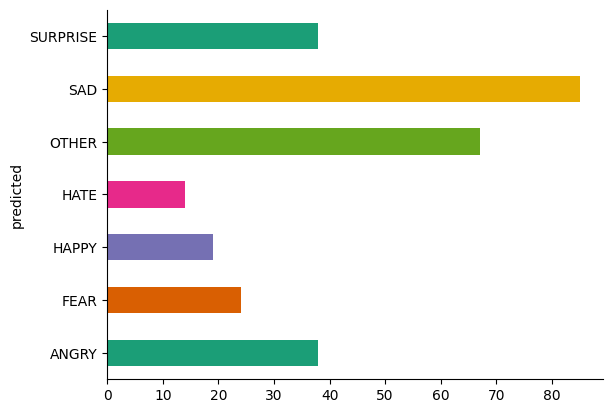

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
incorrect_predictions.groupby('predicted').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

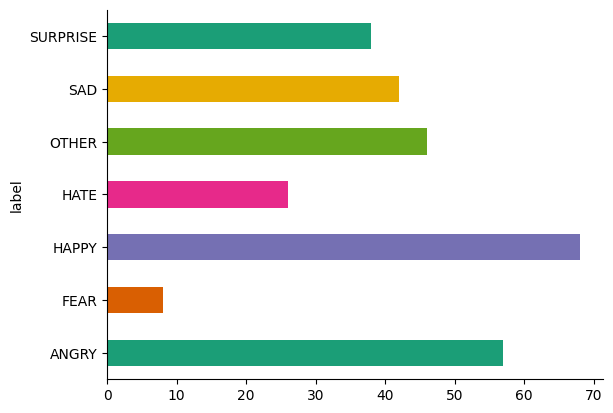

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
incorrect_predictions.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

def plot_confussion_matrix(df):
    plt.subplots(figsize=(8, 8))
    df_2dhist = pd.DataFrame({
        x_label: grp['predicted'].value_counts()
        for x_label, grp in df.groupby('label')
    })
    sns.heatmap(df_2dhist, cmap='RdBu_r')
    plt.xlabel('label')
    _ = plt.ylabel('predicted')

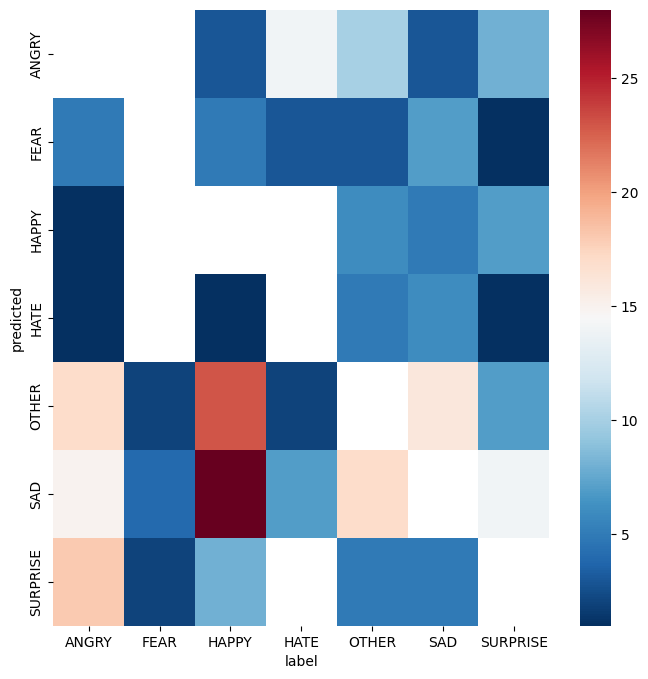

In [ ]:
plot_confussion_matrix(incorrect_predictions)

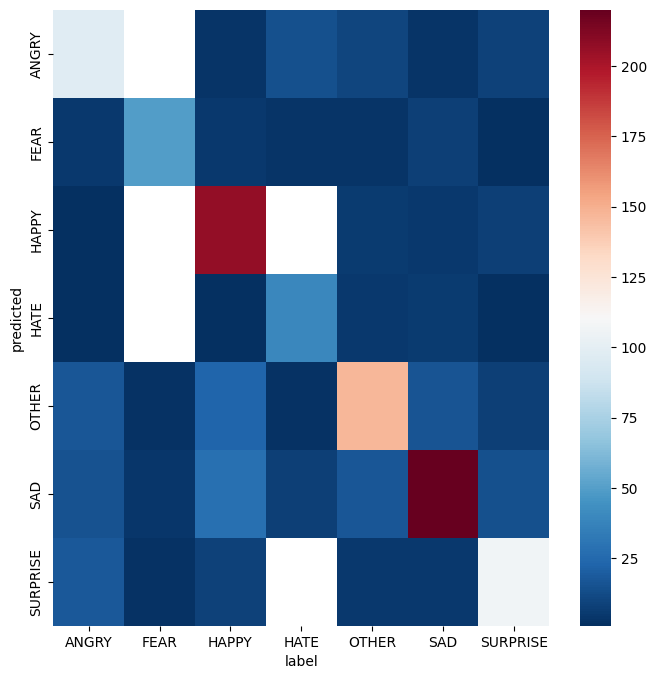

In [ ]:
plot_confussion_matrix(df)

#Load Model

In [ ]:
from transformers import pipeline, AutoModelForSequenceClassification, AutoTokenizer

label_dict_reverse = {0: 'SAD', 1: 'HAPPY', 2: 'SURPRISE', 3: 'HATE', 4: 'FEAR', 5: 'ANGRY', 6: 'OTHER'}

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
model = AutoModelForSequenceClassification.from_pretrained("/content/gdrive/MyDrive/DL_model_v0.3")

# **Prediction Functions**

In [ ]:
def predict_tweet(model, tokenizer, tweet, label_dict_reverse):
    cleaned_tweet = clean_persian_text(tweet)

    nlp = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

    # Use the pipeline to predict the sentiment of a sentence
    result = nlp(cleaned_tweet)[0]
    result['label'] = label_dict_reverse[int(result['label'].lstrip('LABEL_'))]
    result['tweet'] = tweet

    # The result is a list of dictionaries. Each dictionary contains the
    # `label` and `score` for a sentence.
    return result

In [ ]:
def predict_tweets(model, tokenizer, tweets, label_dict_reverse):
    cleaned_tweets = []
    for tweet in tweets:
        cleaned_tweets.append(clean_persian_text(tweet))

    nlp = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

    # Use the pipeline to predict the sentiment of a sentence
    results = nlp(cleaned_tweets)
    for result, tweet in zip(results, tweets):
        result['label'] = label_dict_reverse[int(result['label'].lstrip('LABEL_'))]
        result['tweet'] = tweet

    # The result is a list of dictionaries. Each dictionary contains the
    # `label` and `score` for a sentence.
    return results

In [ ]:
predict_tweet(
    model,
    tokenizer,
    'مربی خارجی حق ندارد ، مربی خارجی بی‌قد و قواره و . ولی میدانید که مردم هم حق اعتراض ندارن ؟ مردم هم خس و خاشاکن ؟ مردم هم بد بختن و شما از همه بهتر میبنید و میدانید ! تریبون اصلی مملکت هم در اختیار شماس ، چه قدمی برداشتید جز سانسور و جز شانتاژ رسانه‌ای ؟',
    label_dict_reverse
)

{'label': 'ANGRY',
 'score': 0.8665198683738708,
 'tweet': 'مربی خارجی حق ندارد ، مربی خارجی بی\u200cقد و قواره و . ولی میدانید که مردم هم حق اعتراض ندارن ؟ مردم هم خس و خاشاکن ؟ مردم هم بد بختن و شما از همه بهتر میبنید و میدانید ! تریبون اصلی مملکت هم در اختیار شماس ، چه قدمی برداشتید جز سانسور و جز شانتاژ رسانه\u200cای ؟'}